# TASK-2:EXPLORATORY DATA ANALYSIS(EDA)

## OBJECTIVE:
- Calculate summary statistics (mean, median, mode,standard deviation).
- Visualize data distributions using histograms, boxplots and scatter plots.
- Find correlations between numerical features.

### 1. IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. READING THE CSV FILE 

In [6]:
churn=pd.read_csv('Churn Prdiction Data/churn-bigml-80.csv')
print(churn.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

### 3. CHECKING FOR NULL VALUES


In [8]:
churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### 4. VERIFYING THE DATATYPES

In [10]:
churn.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

### 5. SUMMARY STATISTICS

In [12]:
numeric_col=churn.select_dtypes(include=['number'])

#### a) MEAN:mean is the sum of all values divided by the number of values

In [14]:
print('Mean:')
numeric_col.mean().round(2)

Mean:


Account length            100.62
Area code                 437.44
Number vmail messages       8.02
Total day minutes         179.48
Total day calls           100.31
Total day charge           30.51
Total eve minutes         200.39
Total eve calls           100.02
Total eve charge           17.03
Total night minutes       201.17
Total night calls         100.11
Total night charge          9.05
Total intl minutes         10.24
Total intl calls            4.47
Total intl charge           2.76
Customer service calls      1.56
dtype: float64

#### b)MEDIAN: The median is the middle value when the values are sorted.

In [16]:
numeric_col.median().round(2)

Account length            100.00
Area code                 415.00
Number vmail messages       0.00
Total day minutes         179.95
Total day calls           101.00
Total day charge           30.59
Total eve minutes         200.90
Total eve calls           100.00
Total eve charge           17.08
Total night minutes       201.15
Total night calls         100.00
Total night charge          9.05
Total intl minutes         10.20
Total intl calls            4.00
Total intl charge           2.75
Customer service calls      1.00
dtype: float64

#### c)MODE: mode is the value that occurs most of the time in a sequence of numbers

In [18]:
numeric_col.mode().iloc[0].round(2)

Account length             93.00
Area code                 415.00
Number vmail messages       0.00
Total day minutes         162.30
Total day calls           105.00
Total day charge           27.59
Total eve minutes         169.90
Total eve calls           105.00
Total eve charge           14.25
Total night minutes       214.70
Total night calls         105.00
Total night charge          9.66
Total intl minutes         10.00
Total intl calls            3.00
Total intl charge           2.70
Customer service calls      1.00
Name: 0, dtype: float64

#### d) STANDARD DEVIATION:  It measures the amount of variation from the mean.

In [20]:
numeric_col.std().round(2)

Account length            39.56
Area code                 42.52
Number vmail messages     13.61
Total day minutes         54.21
Total day calls           19.99
Total day charge           9.22
Total eve minutes         50.95
Total eve calls           20.16
Total eve charge           4.33
Total night minutes       50.78
Total night calls         19.42
Total night charge         2.29
Total intl minutes         2.79
Total intl calls           2.46
Total intl charge          0.75
Customer service calls     1.31
dtype: float64

### 6. VISUALIZING THE DISTRIBUTION

#### a)HISTOGRAM

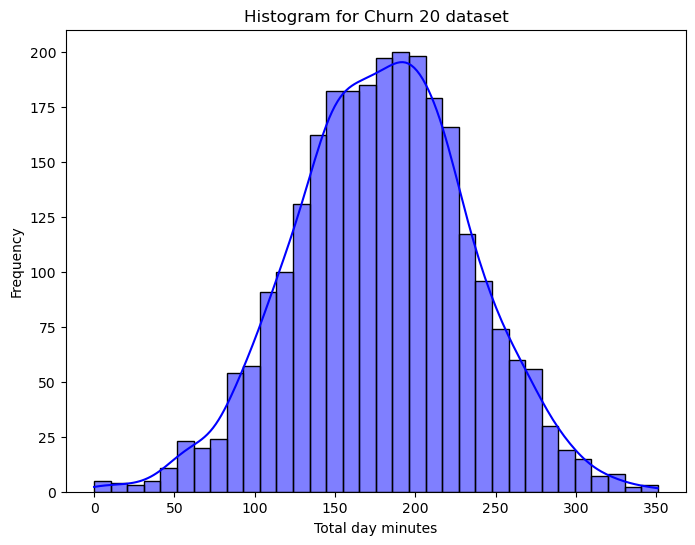

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(churn['Total day minutes'],kde=True,edgecolor='Black',color='Blue')
plt.title('Histogram for Churn 20 dataset')
plt.xlabel('Total day minutes')
plt.ylabel('Frequency')
plt.show()

#### INTERPRETATION:
- The histogram displays the distribution of total day minutes used by customers.
- The majority of customers use between 150 to 200 minutes per day.
- The usage ranges approximately from 30 to 330 minutes.
- The distribution appears to be normal indicating 

#### b)BOX PLOT

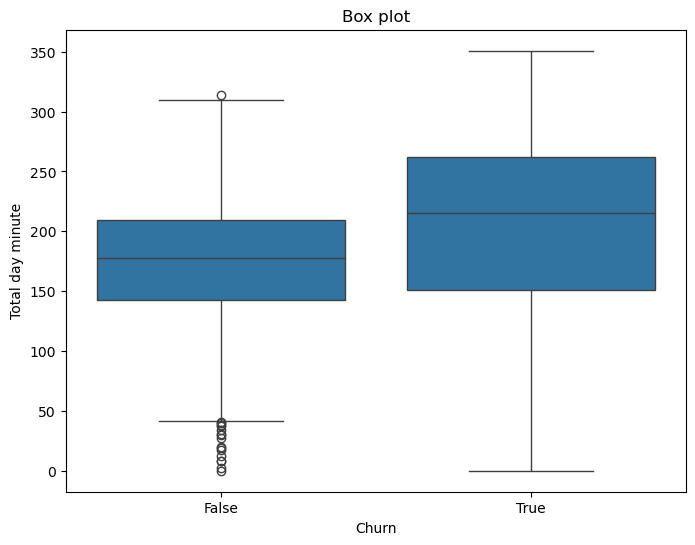

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(y=churn['Total day minutes'],x=churn['Churn'])
plt.title('Box plot')
plt.ylabel('Total day minute')
plt.show()

#### ILLUSTRATION:
- The box plot compares the Total Day Minutes between Churned and Non Churned customers.
- churned users show a larger variation in their daily call duration.
- The plot suggests that customers with higher day time usage are more prone to churn.
- There are also a few low usage outliers among the non churned groups showing that some customers stay despite minimal usage.

#### c)SCATTER PLOT

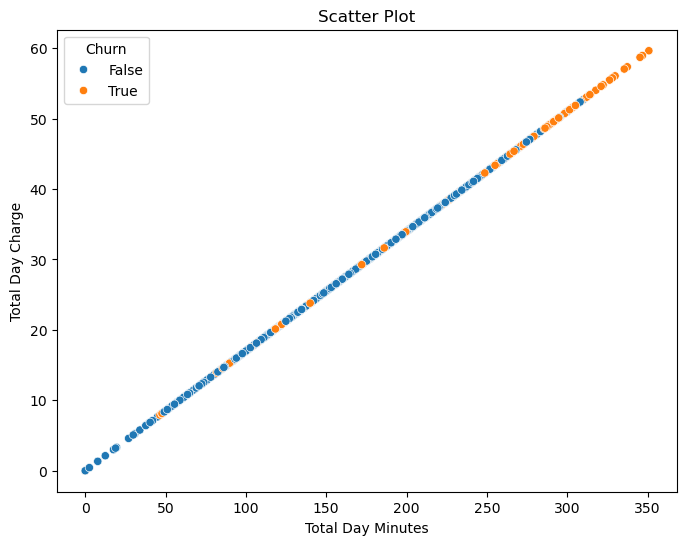

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=churn['Total day minutes'],y=churn['Total day charge'],hue=churn['Churn'])
plt.title('Scatter Plot')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.show()

#### ILLUSTRATION:
- The scatter plot illustartes the relationship between Total Day Minutes and Total Day Charge Categorized by Churn status.
- A clear positive correlation is visible. As the number of day minutes increases, the corresponding  day charge also increases.
- Blue points represent the customer who did not churn and Orange points represent those who did.
- The customers with high day time usage and charges are more likely to churn compare to others. 

### 7. CORRELATION BETWEEN DIFFERENT NUMERICAL FEATURES

In [32]:
print(churn.corr(numeric_only=True))

                        Account length  Area code  Number vmail messages  \
Account length                1.000000  -0.008620              -0.002996   
Area code                    -0.008620   1.000000              -0.000584   
Number vmail messages        -0.002996  -0.000584               1.000000   
Total day minutes             0.002847  -0.023134               0.019027   
Total day calls               0.038862  -0.009629              -0.009622   
Total day charge              0.002843  -0.023130               0.019027   
Total eve minutes            -0.015923   0.000679               0.011401   
Total eve calls               0.018552  -0.018602               0.005131   
Total eve charge             -0.015909   0.000707               0.011418   
Total night minutes          -0.008994  -0.003353              -0.000224   
Total night calls            -0.024007   0.011455               0.008124   
Total night charge           -0.008999  -0.003382              -0.000229   
Total intl m

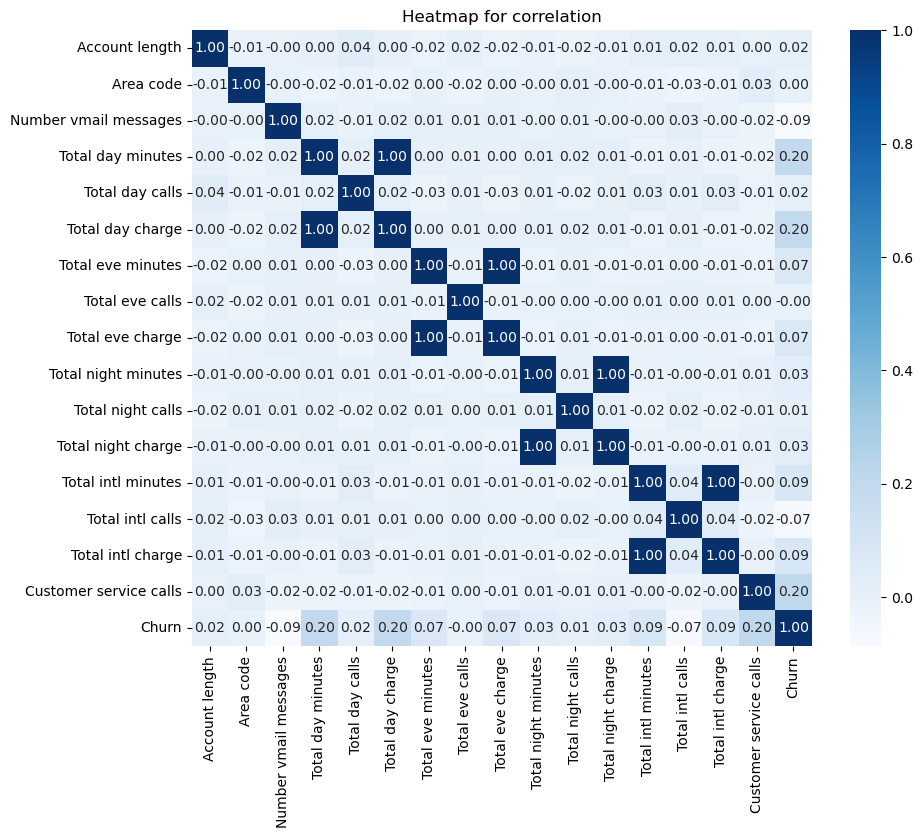

In [36]:
cm=churn.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')
plt.title('Heatmap for correlation')
plt.show()

#### INTERPRETATION:
- Heatmap is used to show the correlation between different numeric features.
- from the heatmap it is seen that Churn has very less correlation with other feature and
the features like:
    1. Total Day Charge-Total Day Minutes
    2. Total Eve Charge-Total Eve Minutes
    3. Total Night Charge-Total Night Minutes
    4. Total Intl charge-Total Intl Minutes
  are highly correlated with each other.